In [2]:
import os
import typing
from sklearn.gaussian_process.kernels import *
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
import matplotlib.pyplot as plt
from matplotlib import cm

In [3]:
train_x = np.loadtxt('train_x.csv', delimiter=',', skiprows=1)
train_y = np.loadtxt('train_y.csv', delimiter=',', skiprows=1)
test_x = np.loadtxt('test_x.csv', delimiter=',', skiprows=1)

In [4]:
test_x

array([[0.67   , 0.95375, 0.     ],
       [0.2425 , 0.88125, 0.     ],
       [0.21   , 0.91375, 1.     ],
       ...,
       [0.59875, 0.49125, 0.     ],
       [0.68125, 0.365  , 1.     ],
       [0.0025 , 0.22   , 0.     ]])

In [5]:
print(f'Shape train_x:\t{train_x.shape}\nShape train_y:\t{train_y.shape}')
train_x


Shape train_x:	(15189, 3)
Shape train_y:	(15189,)


array([[0.8575 , 0.68625, 1.     ],
       [0.41125, 0.675  , 1.     ],
       [0.8625 , 0.90625, 1.     ],
       ...,
       [0.135  , 0.64   , 1.     ],
       [0.07125, 0.78875, 0.     ],
       [0.31625, 0.2125 , 1.     ]])

In [6]:
train_y

array([36.20316838, 55.94634794, 12.04206554, ..., 36.64130863,
       18.66263411, 38.37685245])

In [7]:
def random_undersample(train_x, train_y, n_samples):
    ## Random Undersampling 
    train_comb = np.hstack((train_x, train_y[:, np.newaxis]))

    # Shuffle the rows
    np.random.shuffle(train_comb)

    # Take the first n_samples rows
    train_undersampled = train_comb[:n_samples, :]
    
    # Split them back into data and target
    train_x_usam = train_undersampled[:, :-1]
    train_y_usam = train_undersampled[:, -1]

    return train_x_usam, train_y_usam

In [8]:
train_x_usam, train_y_usam = random_undersample(train_x=train_x, train_y=train_y, n_samples=10_000)
train_x_usam

array([[0.9975 , 0.62125, 0.     ],
       [0.46   , 0.74875, 1.     ],
       [0.245  , 0.69   , 1.     ],
       ...,
       [0.5575 , 0.54875, 1.     ],
       [0.23125, 0.715  , 1.     ],
       [0.06375, 0.2525 , 0.     ]])

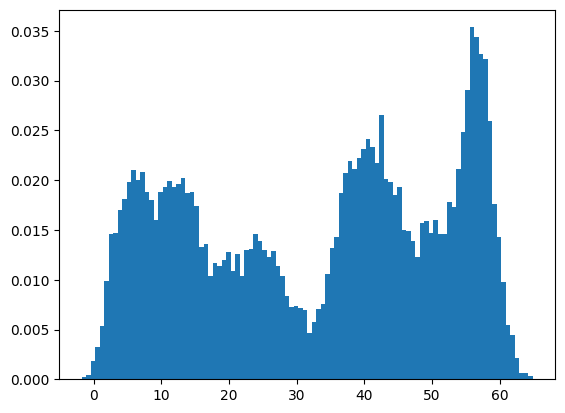

In [28]:
import matplotlib.pyplot as plt
import pandas as pd

plt.hist(train_y, density=True, bins=100);

In [75]:
from sklearn.cluster import KMeans

n_clusters = 5000
kmeans =  KMeans(n_clusters=n_clusters, random_state=0, n_init="auto").fit(train_x[:,0:2])

In [78]:
train_y_usamp = np.zeros(n_clusters)
for k in range(n_clusters):
    train_y_usamp[k] = train_y[kmeans.labels_ == k].mean()        
train_x_usamp = kmeans.cluster_centers_.shape


4999


(5, 2)